<div class="alert alert-success"> 
        <h1 align="center" style="color:chocolate;">🎙️Predict 🎤Podcast Listening👂 Time⌚
</h1>  
     
</div>

<p><center style="color:blue; font-family: 'Dancing Script'; font-size:30px;">🙏🏿Thanks for visiting my notebook 🕺🏿</center></p>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 About The Competition :</font></h3>
    
**Dataset Description**
The dataset for this competition (both train and test) was generated from a deep learning model trained on the Podcast Listening Time Prediction dataset. 

**Files**

**train.csv** – The training dataset; Listening_Time_minutes is the target variable.

**test.csv** – The test dataset; our objective is to predict Listening_Time_minutes for each of the row.

**sample_submission.csv** – A sample submission file in the correct format.

**Exploration**
We got to Explore differences between this dataset and the original Podcast Listening Time Prediction dataset.
Through analysis whether incorporating the original dataset into training improves model performance.
Got to go with visualization techniques for Exploratory Data Analysis (EDA), including feature distributions and correlations for better undersatding of data
Analyze patterns related to podcast duration, genre, user behavior, and other factors affecting listening time.

**Evaluation**
The model will be evaluated using Root Mean Squared Error (RMSE).

**Submission**
train.csv – Training dataset with Listening_Time_minutes labels.
test.csv – Test dataset without Listening_Time_minutes labels.
sample_submission.csv – Required submission format.

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: lightgrey; font-size:100%; text-align:left">

<h3 align="center"><font color='black'>💡 Evalaution Metric :</font></h3>
    
    
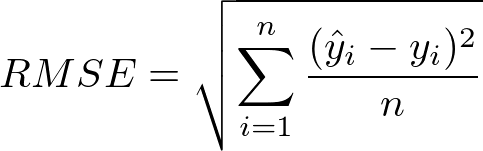
    



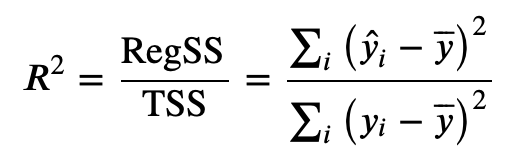

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Importing Libraries</h1>  
     
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_train = pd.read_csv('/kaggle/input/playground-series-s5e4/train.csv')
df_test  = pd.read_csv('/kaggle/input/playground-series-s5e4/test.csv')
df_sub = pd.read_csv('/kaggle/input/playground-series-s5e4/sample_submission.csv')

In [3]:
df_train.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [4]:
df_train.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,750000.000000,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,374999.500000,64.504738,59.859901,52.236449,1.348855,45.437406
std,216506.495284,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,187499.750000,35.730000,39.410000,28.380000,0.000000,23.178350
50%,374999.500000,63.840000,60.050000,53.580000,1.000000,43.379460
75%,562499.250000,94.070000,79.530000,76.600000,2.000000,64.811580
max,749999.000000,325.240000,119.460000,119.910000,103.910000,119.970000


In [5]:
df_test.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral


In [6]:
df_sub.head()

,id,Listening_Time_minutes
0,750000,45.437
1,750001,45.437
2,750002,45.437
3,750003,45.437
4,750004,45.437


In [7]:
df_train.drop(columns=['id'], inplace=True)
df_test.drop(columns=['id'], inplace=True)


In [8]:
df_train.shape,df_test.shape

((750000, 11), (250000, 10))

In [9]:
df_train.isnull().sum()

Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [10]:
df_test.isnull().sum()

Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         28736
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    48832
Number_of_Ads                      0
Episode_Sentiment                  0
dtype: int64

In [11]:
df_train.shape,df_test.shape,df_sub.shape

((750000, 11), (250000, 10), (250000, 2))

In [12]:
df_train.corr()

/tmp/ipykernel_20/299540020.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()


,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
Episode_Length_minutes,1.000000,0.023596,-0.009704,-0.054953,0.916749
Host_Popularity_percentage,0.023596,1.000000,0.022431,-0.017896,0.050870
Guest_Popularity_percentage,-0.009704,0.022431,1.000000,0.007933,-0.016014
Number_of_Ads,-0.054953,-0.017896,0.007933,1.000000,-0.118337
Listening_Time_minutes,0.916749,0.050870,-0.016014,-0.118337,1.000000


In [13]:
df_train.dtypes

Podcast_Name                    object
Episode_Title                   object
Episode_Length_minutes         float64
Genre                           object
Host_Popularity_percentage     float64
Publication_Day                 object
Publication_Time                object
Guest_Popularity_percentage    float64
Number_of_Ads                  float64
Episode_Sentiment               object
Listening_Time_minutes         float64
dtype: object

In [14]:
df_train['Publication_Time'].unique()

array(['Night', 'Afternoon', 'Evening', 'Morning'], dtype=object)

In [15]:
df_train['Episode_Sentiment'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [16]:
df_train['Podcast_Name'].unique()

array(['Mystery Matters', 'Joke Junction', 'Study Sessions',
       'Digital Digest', 'Mind & Body', 'Fitness First', 'Criminal Minds',
       'News Roundup', 'Daily Digest', 'Music Matters', 'Sports Central',
       'Melody Mix', 'Game Day', 'Gadget Geek', 'Global News',
       'Tech Talks', 'Sport Spot', 'Funny Folks', 'Sports Weekly',
       'Business Briefs', 'Tech Trends', 'Innovators', 'Health Hour',
       'Comedy Corner', 'Sound Waves', 'Brain Boost', "Athlete's Arena",
       'Wellness Wave', 'Style Guide', 'World Watch', 'Humor Hub',
       'Money Matters', 'Healthy Living', 'Home & Living',
       'Educational Nuggets', 'Market Masters', 'Learning Lab',
       'Lifestyle Lounge', 'Crime Chronicles', 'Detective Diaries',
       'Life Lessons', 'Current Affairs', 'Finance Focus', 'Laugh Line',
       'True Crime Stories', 'Business Insights', 'Fashion Forward',
       'Tune Time'], dtype=object)

In [17]:
df_train['Publication_Day'].unique()

array(['Thursday', 'Saturday', 'Tuesday', 'Monday', 'Sunday', 'Wednesday',
       'Friday'], dtype=object)

In [18]:
common_cols = df_train.columns.intersection(df_test.columns)

numerical_cols = df_train[common_cols].select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_train[common_cols].select_dtypes(include=['object']).columns

df_train[numerical_cols] = df_train[numerical_cols].fillna(df_train[numerical_cols].median())
df_test[numerical_cols] = df_test[numerical_cols].fillna(df_train[numerical_cols].median())
df_train[categorical_cols] = df_train[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))
df_test[categorical_cols] = df_test[categorical_cols].apply(lambda x: x.fillna(df_train[x.name].mode()[0]))

In [19]:
common_cols = df_train.columns.intersection(df_test.columns)
categorical_cols = df_train[common_cols].select_dtypes(include=['object']).columns

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🎇🌭Regression Analysis♒🌊</h1>  
     
</div>

In [20]:
y = df_train['Listening_Time_minutes'] 

In [21]:
df_train = pd.read_csv('/kaggle/input/interstellarspacetri/datap/train.csv')
df_test  = pd.read_csv('/kaggle/input/interstellarspacetri/datap/test.csv')

In [22]:
X = df_train
X_test = df_test

In [23]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
import gc
from category_encoders import TargetEncoder
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor, Pool
import xgboost as xgb

In [24]:
encoded_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

xgb_params = {
    'n_estimators': 560,
    'max_depth': 14,
    'learning_rate': 0.04222,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42,
    'tree_method': 'hist', 
    'n_jobs': -1  
}


n_splits = 15
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
scores = []
test_preds = np.zeros(len(X_test)) 

for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
    print(f"Training fold {fold + 1}/{n_splits}...")    
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]   
    model = xgb.XGBRegressor(**xgb_params)
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=100, verbose=100)    
    val_pred = model.predict(X_val)
    score = rmse(y_val, val_pred)
    scores.append(score)
    test_preds += model.predict(X_test) / n_splits      
    print(f"Fold {fold + 1} RMSE: {score:.4f}")
print(f'Optimized Cross-validated RMSE score: {np.mean(scores):.3f} +/- {np.std(scores):.3f}')
print(f'Max RMSE score: {np.max(scores):.3f}')
print(f'Min RMSE score: {np.min(scores):.3f}')

Training fold 1/15...


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:50.33059
[100]	validation_0-rmse:12.74034
[200]	validation_0-rmse:12.58021
[300]	validation_0-rmse:12.50587
[400]	validation_0-rmse:12.47040
[500]	validation_0-rmse:12.44875
[559]	validation_0-rmse:12.43830
Fold 1 RMSE: 12.4383
Training fold 2/15...


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:50.17532
[100]	validation_0-rmse:12.78389
[200]	validation_0-rmse:12.63829
[300]	validation_0-rmse:12.56855
[400]	validation_0-rmse:12.53007
[500]	validation_0-rmse:12.50342
[559]	validation_0-rmse:12.49544
Fold 2 RMSE: 12.4954
Training fold 3/15...


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:50.64085
[100]	validation_0-rmse:12.76506
[200]	validation_0-rmse:12.61003
[300]	validation_0-rmse:12.54576
[400]	validation_0-rmse:12.51065
[500]	validation_0-rmse:12.49515
[559]	validation_0-rmse:12.49113
Fold 3 RMSE: 12.4911
Training fold 4/15...


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:50.37155
[100]	validation_0-rmse:12.74605
[200]	validation_0-rmse:12.60638
[300]	validation_0-rmse:12.54137
[400]	validation_0-rmse:12.50717
[500]	validation_0-rmse:12.48673
[559]	validation_0-rmse:12.47965
Fold 4 RMSE: 12.4796
Training fold 5/15...


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:50.64753
[100]	validation_0-rmse:12.86746
[200]	validation_0-rmse:12.70895
[300]	validation_0-rmse:12.65087
[400]	validation_0-rmse:12.61698
[500]	validation_0-rmse:12.60389
[559]	validation_0-rmse:12.59438
Fold 5 RMSE: 12.5944
Training fold 6/15...
[0]	validation_0-rmse:50.44581


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[100]	validation_0-rmse:12.83360
[200]	validation_0-rmse:12.68634
[300]	validation_0-rmse:12.62116
[400]	validation_0-rmse:12.58594
[500]	validation_0-rmse:12.56705
[559]	validation_0-rmse:12.56697
Fold 6 RMSE: 12.5665
Training fold 7/15...
[0]	validation_0-rmse:50.43584


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[100]	validation_0-rmse:12.75308
[200]	validation_0-rmse:12.59489
[300]	validation_0-rmse:12.52851
[400]	validation_0-rmse:12.48887
[500]	validation_0-rmse:12.46662
[559]	validation_0-rmse:12.45655
Fold 7 RMSE: 12.4565
Training fold 8/15...


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:50.38322
[100]	validation_0-rmse:12.82222
[200]	validation_0-rmse:12.67535
[300]	validation_0-rmse:12.60753
[400]	validation_0-rmse:12.56833
[500]	validation_0-rmse:12.54458
[559]	validation_0-rmse:12.53499
Fold 8 RMSE: 12.5350
Training fold 9/15...
[0]	validation_0-rmse:50.41809


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[100]	validation_0-rmse:12.83743
[200]	validation_0-rmse:12.68707
[300]	validation_0-rmse:12.62388
[400]	validation_0-rmse:12.58714
[500]	validation_0-rmse:12.57254
[559]	validation_0-rmse:12.56637
Fold 9 RMSE: 12.5664
Training fold 10/15...
[0]	validation_0-rmse:50.40808


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[100]	validation_0-rmse:12.73632
[200]	validation_0-rmse:12.57366
[300]	validation_0-rmse:12.50313
[400]	validation_0-rmse:12.46670
[500]	validation_0-rmse:12.45332
[559]	validation_0-rmse:12.44590
Fold 10 RMSE: 12.4459
Training fold 11/15...
[0]	validation_0-rmse:50.26423


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[100]	validation_0-rmse:12.77804
[200]	validation_0-rmse:12.63909
[300]	validation_0-rmse:12.57983
[400]	validation_0-rmse:12.54735
[500]	validation_0-rmse:12.52928
[559]	validation_0-rmse:12.51938
Fold 11 RMSE: 12.5192
Training fold 12/15...
[0]	validation_0-rmse:50.51790


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[100]	validation_0-rmse:12.88118
[200]	validation_0-rmse:12.71807
[300]	validation_0-rmse:12.65605
[400]	validation_0-rmse:12.61414
[500]	validation_0-rmse:12.59624
[559]	validation_0-rmse:12.58644
Fold 12 RMSE: 12.5864
Training fold 13/15...
[0]	validation_0-rmse:50.30088


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[100]	validation_0-rmse:12.68726
[200]	validation_0-rmse:12.54639
[300]	validation_0-rmse:12.49184
[400]	validation_0-rmse:12.46813
[500]	validation_0-rmse:12.45523
[559]	validation_0-rmse:12.45083
Fold 13 RMSE: 12.4504
Training fold 14/15...
[0]	validation_0-rmse:50.71788


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[100]	validation_0-rmse:12.79505
[200]	validation_0-rmse:12.65233
[300]	validation_0-rmse:12.59416
[400]	validation_0-rmse:12.56782
[500]	validation_0-rmse:12.55623
[559]	validation_0-rmse:12.54964
Fold 14 RMSE: 12.5496
Training fold 15/15...
[0]	validation_0-rmse:50.30117


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[100]	validation_0-rmse:12.78302
[200]	validation_0-rmse:12.62017
[300]	validation_0-rmse:12.54181
[400]	validation_0-rmse:12.50410
[500]	validation_0-rmse:12.48383
[559]	validation_0-rmse:12.47300
Fold 15 RMSE: 12.4730
Optimized Cross-validated RMSE score: 12.510 +/- 0.052
Max RMSE score: 12.594
Min RMSE score: 12.438


<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🎇🌭Plots from results for XGboost♒🌊</h1>  
     
</div>

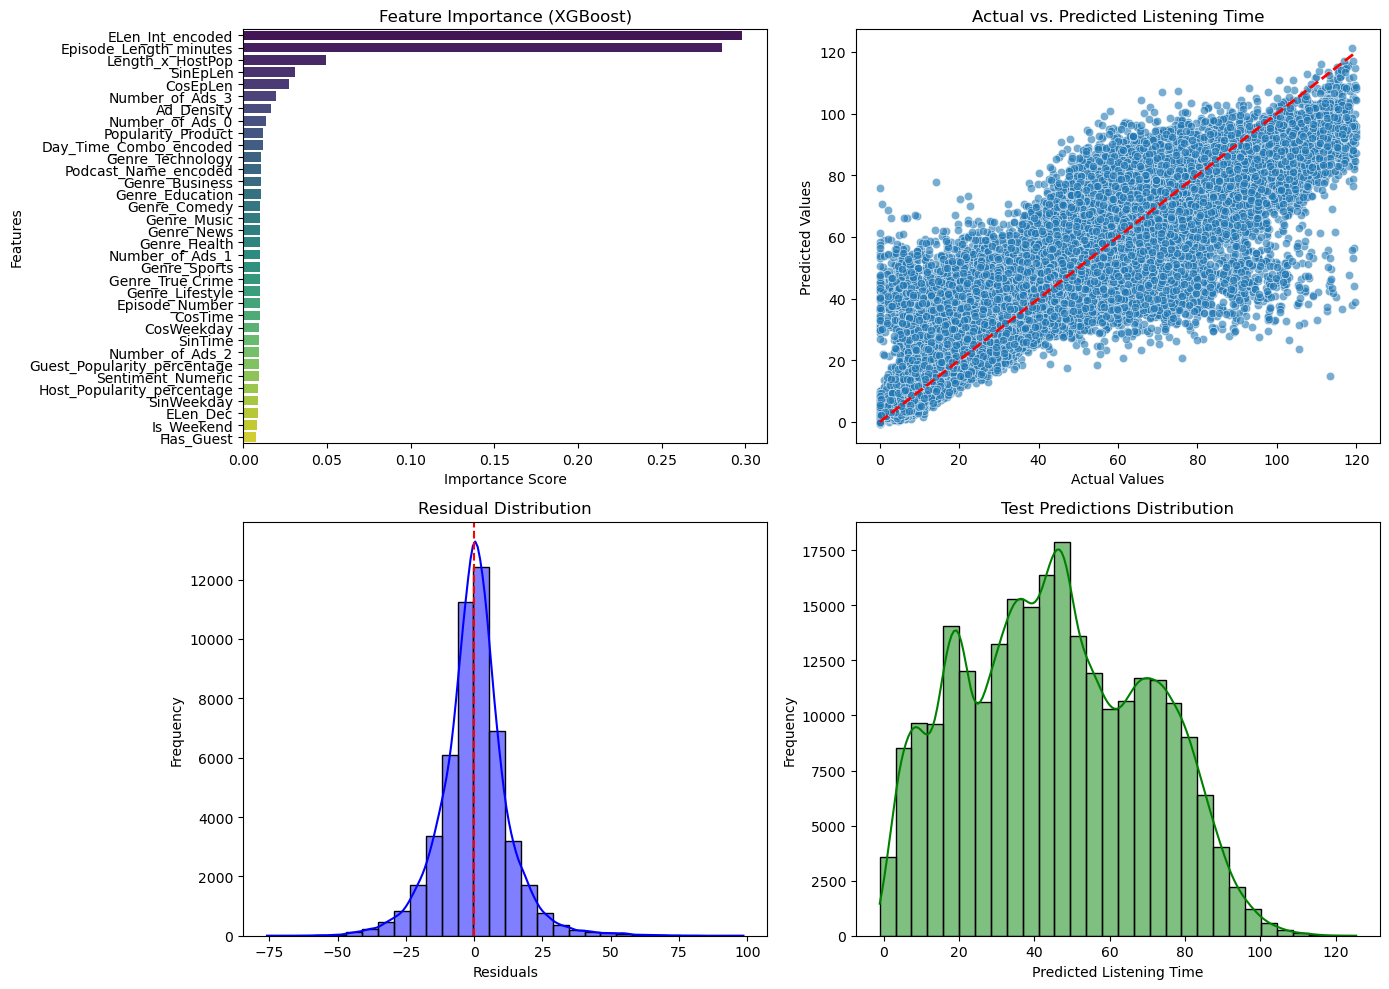

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

feature_importance = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis", ax=axes[0, 0])
axes[0, 0].set_title("Feature Importance (XGBoost)")
axes[0, 0].set_xlabel("Importance Score")
axes[0, 0].set_ylabel("Features")

sns.scatterplot(x=y_val, y=val_pred, alpha=0.6, edgecolors="k", ax=axes[0, 1])
axes[0, 1].plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], '--r', linewidth=2) 
axes[0, 1].set_title("Actual vs. Predicted Listening Time")
axes[0, 1].set_xlabel("Actual Values")
axes[0, 1].set_ylabel("Predicted Values")

residuals = y_val - val_pred
sns.histplot(residuals, bins=30, kde=True, color='blue', ax=axes[1, 0])
axes[1, 0].axvline(0, color='red', linestyle='--')
axes[1, 0].set_title("Residual Distribution")
axes[1, 0].set_xlabel("Residuals")
axes[1, 0].set_ylabel("Frequency")

sns.histplot(test_preds, bins=30, kde=True, color='green', ax=axes[1, 1])
axes[1, 1].set_title("Test Predictions Distribution")
axes[1, 1].set_xlabel("Predicted Listening Time")
axes[1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [26]:

df_sub.head()

,id,Listening_Time_minutes
0,750000,45.437
1,750001,45.437
2,750002,45.437
3,750003,45.437
4,750004,45.437


<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🗞📜Final Submission♒🌊</h1>  
     
</div>

In [27]:
df_sub['Listening_Time_minutes'] = test_preds

In [28]:
df_sub.to_csv('submission.csv', index=False)

In [29]:
df_sub.head()

,id,Listening_Time_minutes
0,750000,54.417994
1,750001,21.030517
2,750002,50.668601
3,750003,74.708694
4,750004,45.945948


<Axes: >

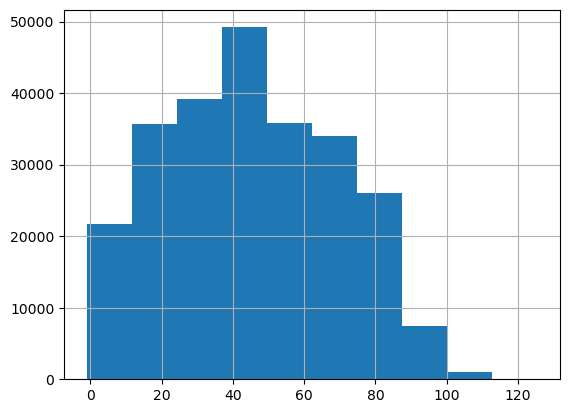

In [30]:
df_sub['Listening_Time_minutes'].hist()